## Horses or Humans

In this Pytorch notebook we are going to see how to implement Convolutional Neural Networks on Humans vs Horses dataset from Kaggle: https://www.kaggle.com/sanikamal/horses-or-humans-dataset

To make the project more generic we are going to download the dataset from this notebook only, by utilizing the Kaggle API from Github. https://github.com/Kaggle/kaggle-api

So, lets get started!

In [1]:
## Importing the necessary packages ##
import torch
import torchvision

from torch import nn
from torchvision.transforms import transforms
from torch.utils.data import DataLoader
from torch.utils.data import SubsetRandomSampler
from torchvision.datasets import ImageFolder
from torchvision.utils import make_grid

import numpy as np
import matplotlib.pyplot as plt

**Disclaimer**: Don't be overwhelmed with all the imports. Its my habit to use the first cell for importing purpose!

Now, lets download the dataset.
We are going to use Kaggle for this purpose.

In [ ]:
## Download Data Function ##

def download_data(directory):
    '''
    Returns downloaded dataset from given url, stores in directory with filename.
    '''
    
    !kaggle datasets download sanikamal/horses-or-humans-dataset -p $directory --unzip

Now lets load the dataset!

In [ ]:
download_data('data')

Its so smooth. Its definitely something to look at.

Okay so moving on.

What do we do next?

Well, we need to import the images as tensors via the ImageFolder method.

Lets do that!

In [2]:
## Importing Dataset as Tensors ##

train_dataset = ImageFolder(root = 'data/horse-or-human/train',
                            transform = transforms.ToTensor())

And the dataset is loaded.

Lets check the length of the dataset.

In [3]:
len(train_dataset)

1027

Okay, so the dataset is of 1027 images.

Lets check the shape of the image file and see the label too!

In [4]:
## Picking one image for checking ##

img , label = train_dataset[0]

print(img.shape)
print(label)

torch.Size([3, 300, 300])
0


Okay! The images are big enough.

Now one might wonder what is that 0 for label.
Well its just encoded.

We can convert it back to classes via <code>dataset.classes</code>

In [5]:
train_dataset.classes[0]  ##checking what 0 class is

'horses'

Well we can visualize a that image also to see if they are really horses.

Label is : horses


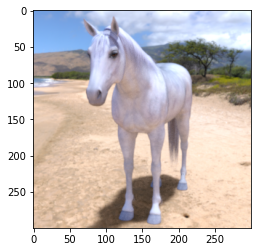

In [6]:
plt.imshow(img.permute(1 , 2 , 0))
print('Label is :' , train_dataset.classes[label])
plt.show()

That a very shiny horse! Well its cartoonish!

Anyways lets carry on.

Its always better to build our model first.

So, lets do that!

In here, we are going to implement using Classes.

In [7]:
## Configuring our Model ##

class HorseHumanModel(nn.Module):
    '''
    HorseHumanModel inherited from nn.Module class.
    '''
    def __init__(self , in_channel , hid_out_channel):
        super().__init__()
        self.model = nn.Sequential(
            nn.Conv2d(in_channels = in_channel , out_channels = hid_out_channel , kernel_size = (3 , 3) , stride = 1 , padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2 , 2),  ## output = (8 , 150 , 150)
            
            nn.Conv2d(in_channels = hid_out_channel , out_channels = hid_out_channel * 2 , kernel_size = (3 , 3), stride = 1 , padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2 , 2),  ## output = (16 , 75 , 75) 
            
            nn.Conv2d(in_channels = hid_out_channel * 2 , out_channels = hid_out_channel * 4 , kernel_size = (3 , 3) , stride = 1 , padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2 , 2),  ## output = (32 , 37 , 37)
            
            nn.Conv2d(in_channels = hid_out_channel * 4 , out_channels = hid_out_channel * 8 , kernel_size = (3 , 3) , stride = 1 , padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2 , 2),  ## output = (64 , 18 , 18)
            
            nn.Conv2d(in_channels = hid_out_channel * 8 , out_channels = hid_out_channel * 16 , kernel_size = (3 , 3) , stride = 1 , padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2 , 2),  ## output = (128 , 9 , 9)
            
            nn.Conv2d(in_channels = hid_out_channel * 16 , out_channels = hid_out_channel * 32 , kernel_size = (3 , 3) , stride = 1 , padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2 , 2),  ## output = (256 , 4 , 4)
            
            nn.Conv2d(in_channels = hid_out_channel * 32 , out_channels = hid_out_channel * 64 , kernel_size = (3 , 3) , stride = 1 , padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2 , 2),  ## output = (512 , 2 , 2)
            
            nn.Conv2d(in_channels = hid_out_channel * 64 , out_channels = hid_out_channel * 128 , kernel_size = (3 , 3) , stride = 1 , padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2 , 2),  ## output = (1024 , 1 , 1)
            
            nn.Flatten(), ## output = (1024 * 1 * 1 = 1024)
            nn.Linear(1024 , 1)
        )
        
    def forward(self , xb):
        out = self.model(xb)
        return out

In [8]:
## setting our model ##

class_model = HorseHumanModel(3 , 8)

## getting the model config
class_model

HorseHumanModel(
  (model): Sequential(
    (0): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU()
    (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (9): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    

Now with the model set, lets set our DataLoader.

But first randomize the indices.

In [9]:
## Random Index Generator ##

def random_index(total_len , valid_percent):
    valid_len = int(total_len * valid_percent)
    random_idx = np.random.permutation(total_len)
    return random_idx[:valid_len] , random_idx[valid_len:]

## Setting the indices ##

valid_idx , train_idx = random_index(len(train_dataset) , 0.10)

print(len(valid_idx) , len(train_idx))

102 925


Lets implement our DataLoader.

In [10]:
## Setting the Training DataLoader ##

train_sampler = SubsetRandomSampler(train_idx)
train_data = DataLoader(train_dataset , 
                        batch_size = 16 , 
                        sampler = train_sampler)

## Setting the Validation DataLoader ##
val_sampler = SubsetRandomSampler(valid_idx)
val_data = DataLoader(train_dataset , 
                        batch_size = 16 , 
                        sampler = val_sampler)

Lets visualize a batch of training data using torchvision make_grade method.

In [11]:
## Helper Function to view batch of images ##

def view_images(dl):
    for img , labels in dl:
        fig , ax = plt.subplots(figsize = (10 , 10))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(img , 8).permute(1 , 2 , 0))
        break

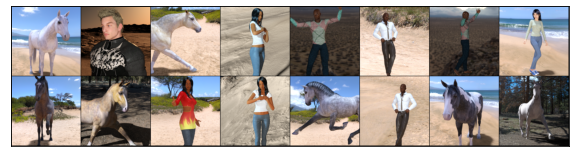

In [12]:
view_images(train_data)  ##checking some training images

Now, its time to set the functions for GPU transfer!

In [13]:
## Check Cuda Availability to set device ##

def get_device():
    
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
## Setting the device ##
device = get_device()
device

device(type='cuda')

Cuda has been spotted!

In [14]:
## Transfer to device ##

def transfer_to_device(data , device):
    if isinstance(data , (list , tuple)):
        return [transfer_to_device(each_data , device) for each_data in data]
    return data.to(device)

In [15]:
## Setting Dataloader to yield batches of data to specific device ##

class transfer_dataloader():
    def __init__(self , dl , device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        for batches in self.dl:
            yield transfer_to_device(batches , self.device)
    
    def __len__(self):
        return len(self.dl)
    

## Setting the dataloader for GPU ##

train_dl = transfer_dataloader(train_data , device)
val_dl = transfer_dataloader(val_data , device)

Done!!

In [16]:
## Setting the model in GPU 
class_model = transfer_to_device(class_model , device)

In [17]:
## Confirm if model is in GPU ##
next(class_model.parameters()).is_cuda

True

Yep! It is!

Lets define the accuracy metrics.

In [18]:
def accuracy(pred , target):
    num = (torch.sum(pred == target)).item()
    den = pred.numel()
    return num / den 

Now we are going to develop our training function.

But we are going to separate out the train block and validation block to make the code easier to look.

In [19]:
def train_epoch(model , train_dl , loss_func , optim):
    
    train_epoch_loss = []
    train_epoch_acc = []
    
    ## Training ##
    for xb , yb in train_dl:
            
        ## make predictions ##
        y_pred = model(xb)
        out = (y_pred > 0.5).float().reshape(-1 , 1)
            
        ## get the loss ##
        loss = loss_func(y_pred , yb.reshape(-1 , 1).type(torch.cuda.FloatTensor))
            
        ## store loss ##
        train_epoch_loss.append(loss.item())
            
        ## calculate backpropagation ##
        loss.backward()
            
        ## optimize one step ##
        optim.step()
            
        ## reset the gradients ##
        optim.zero_grad()
            
        ## calculate accuracy ##
        train_acc = accuracy(out , yb.reshape(-1 , 1))
            
        ## store accuracy ##
        train_epoch_acc.append(train_acc)
        
    return train_epoch_loss , train_epoch_acc

In [20]:
def val_epoch(model , val_dl , loss_func):
    
    val_epoch_loss = []
    val_epoch_acc = []
    
    ## Evaluation ##
    for x_val , y_val in val_dl:
            
        ## setting grad to none ##
        with torch.no_grad():
                
            ## get validation prediction ##
            y_val_pred = model(x_val)
            y_out = (y_val_pred > 0.5).float()
                
            ## get loss ##
            val_loss = loss_func(y_val_pred , y_val.reshape(-1 , 1).type(torch.cuda.FloatTensor))
                
            ## store val loss ##
            val_epoch_loss.append(val_loss.item())
                
            ## calculate accuracy ##
            val_acc = accuracy(y_out , y_val.reshape(-1 , 1))
                
            val_epoch_acc.append(val_acc)
            
    return val_epoch_loss , val_epoch_acc

In [21]:
def fit(model , train_dl , val_dl , num_epochs , optim , loss_func):
    
    ## setting the training loss and metric storage ##
    train_losses = []
    train_accuracies = []
    
    ## setting the validation loss and metric storage ##
    val_losses = []
    val_accuracies = []
    
    for epoch in range(num_epochs):
        
        train_epoch_loss , train_epoch_acc = train_epoch(model , train_dl , loss_func , optim)
        
        val_epoch_loss , val_epoch_acc = val_epoch(model , val_dl , loss_func)
                
        final_train_epoch_loss = sum(train_epoch_loss) / len(train_epoch_loss)
        final_train_epoch_acc = sum(train_epoch_acc) / len(train_epoch_acc)
        
        final_val_epoch_loss = sum(val_epoch_loss) / len(val_epoch_loss)
        final_val_epoch_acc = sum(val_epoch_acc) / len(val_epoch_acc)
        
        train_losses.append(final_train_epoch_loss)
        train_accuracies.append(final_train_epoch_acc)
        
        val_losses.append(final_val_epoch_loss)
        val_accuracies.append(final_val_epoch_acc)
        
        print('Epoch [{} / {}] :- Train Loss : {:.4f} , Train Accuracy : {:.4f} , Val Loss : {:.4f} ,  Val Accuracy : {:.4f}'.format(epoch + 1 , num_epochs , final_train_epoch_loss, final_train_epoch_acc ,  final_val_epoch_loss , final_val_epoch_acc))
    return train_losses , train_accuracies, val_losses, val_accuracies

In [22]:
loss_func = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(class_model.parameters() , lr = 1e-3)

history = fit(class_model , train_dl , val_dl , num_epochs = 5 , optim = optimizer , loss_func = loss_func)

Epoch [1 / 5] :- Train Loss : 0.6941 , Train Accuracy : 0.4826 , Val Loss : 0.6947 ,  Val Accuracy : 0.5417
Epoch [2 / 5] :- Train Loss : 0.6199 , Train Accuracy : 0.5913 , Val Loss : 0.2499 ,  Val Accuracy : 0.9196
Epoch [3 / 5] :- Train Loss : 0.2202 , Train Accuracy : 0.9095 , Val Loss : 0.3598 ,  Val Accuracy : 0.8869
Epoch [4 / 5] :- Train Loss : 0.1699 , Train Accuracy : 0.9308 , Val Loss : 0.1765 ,  Val Accuracy : 0.9286
Epoch [5 / 5] :- Train Loss : 0.0851 , Train Accuracy : 0.9655 , Val Loss : 0.2319 ,  Val Accuracy : 0.9583


Lets check our model.

In [24]:
test_dataset = ImageFolder(root = 'data/horse-or-human/validation',
                            transform = transforms.ToTensor())

In [38]:
len(test_dataset)

256

In [36]:
def get_prediction(model , image):
    image = transfer_to_device(image.unsqueeze(0) , device)
    pred_ = model(image)
    y_out = (pred_ > 0.5).float()
    return train_dataset.classes[int(y_out.item())]

Predicted : horses Original : horses


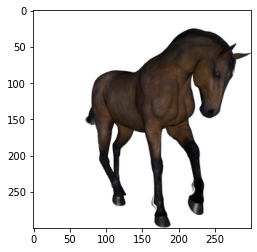

In [37]:
## Checking for one prediction ##

img , label = test_dataset[0]
plt.imshow(img.permute(1 , 2 , 0))
prediction = get_prediction(class_model , img)
print('Predicted :' , prediction , 'Original :' , train_dataset.classes[label])

Predicted : humans Original : humans


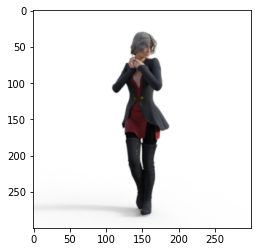

In [39]:
img , label = test_dataset[158]
plt.imshow(img.permute(1 , 2 , 0))
prediction = get_prediction(class_model , img)
print('Predicted :' , prediction , 'Original :' , train_dataset.classes[label])

Lets get a final accuracy for the testing set.

In [40]:
test_dl = transfer_dataloader(DataLoader(test_dataset , batch_size = 16) , device)

In [41]:
_ , test_acc = val_epoch(class_model , test_dl , loss_func)
final_test_acc = sum(test_acc) / len(test_acc)
print('Accuracy :' , final_test_acc)

Accuracy : 0.8671875


Yay! Achieved an accuracy of 86%.

Thats all!